# TP1 - VP1
### Andrés Merli

# Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.

In [1]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Leemos las imagenes con OpenCV en escala de grises y visualizamos

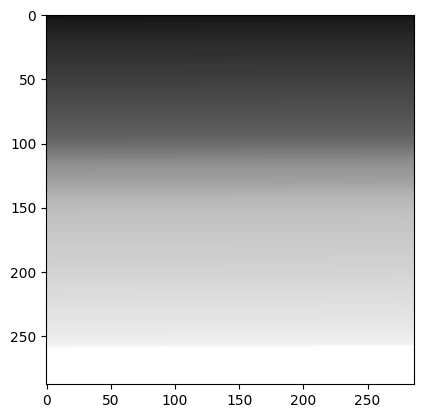

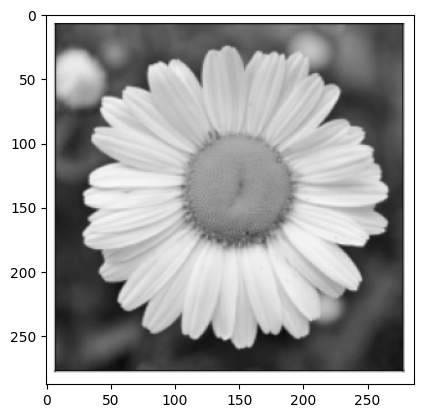

In [2]:
img1_gray = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_gray = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
plt.show()

Graficamos los Histogramas

In [3]:
hist1, bins1 = np.histogram(img1_gray.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(img2_gray.ravel(), 256, [0, 256])

(Text(0.5, 1.0, 'img2'), [<matplotlib.lines.Line2D at 0x1a9d4e706a0>])

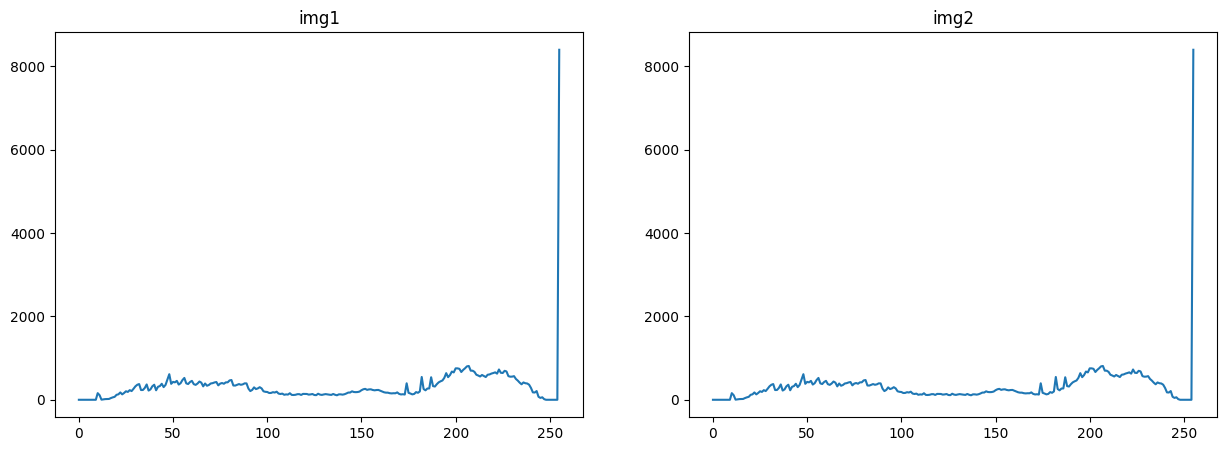

In [4]:
plt.subplots(figsize=(15, 5))
plt.subplot(121).set_title("img1"), plt.plot(hist1)
plt.subplot(122).set_title("img2"), plt.plot(hist2)

In [5]:
(hist1 == hist2).sum()

256

### Se observa que dos imágenes totalmente DISTINTAS presentan histogramas (1D) IDÉNTICOS, es decir con los mismos colores (grises) vemos 2 imagenes diferentes
### Si bien esto no es muy probable, podríamos concluir que quizás no resultaría muy útil considerar como feature a los histogramas de imagenes en escalas de grises para entrenar algun modelo.
### La ocurrencia de esto sería menos probable para imagenes a color, para lo que podríamos utilizar histogramas 2D

## Segmentación

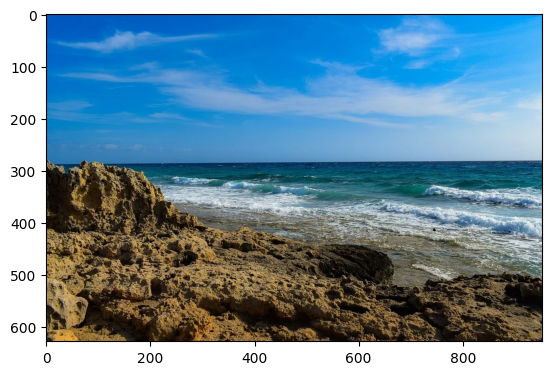

In [6]:
## Leemos la imagen segmentacion.png

img_seg = cv.imread('segmentacion.png')
img_seg = cv.cvtColor(img_seg, cv.COLOR_BGR2RGB)
plt.imshow(img_seg)
plt.show()

In [24]:
hist_r, bins_r = np.histogram(img_seg[:,:,0].ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(img_seg[:,:,1].ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(img_seg[:,:,2].ravel(), 256, [0, 256])

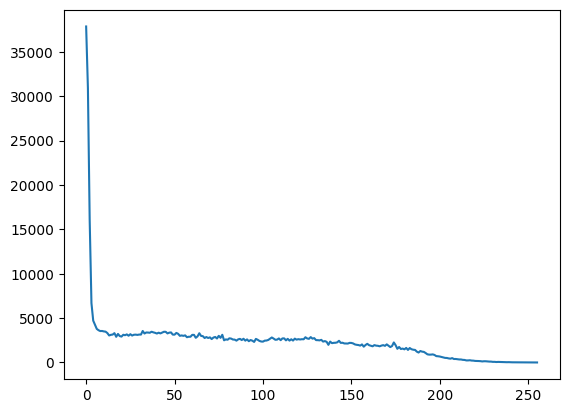

In [26]:
plt.plot(hist_r)

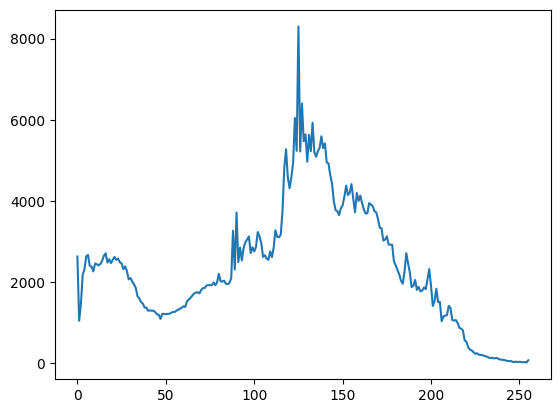

In [27]:
plt.plot(hist_g)

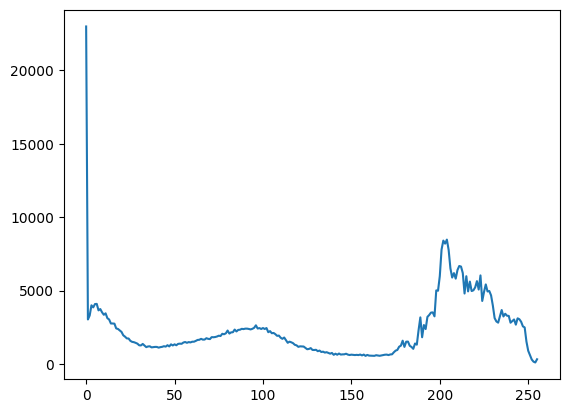

In [28]:
plt.plot(hist_b)